# Mini-Project (AI-AUG)

## Twitter User Gender Classification 

### Data Cleaning & Exploratory Data Analysis

We are provided with only the profiles of the users of twitter and we need to predict the gender of the user(*male, female* or *brand*). The dataset used for training is a dataset provided from Kaggle and the link is [here](https://www.kaggle.com/crowdflower/twitter-user-gender-classification).

*The dataset contains the following fields:* 
- **unitid**: a unique id for user
- **golden**: whether the user was included in the gold standard for the model; TRUE or FALSE
- **unitstate**: state of the observation; one of finalized (for contributor-judged) or golden (for gold standard observations)
- **trustedjudgments**: number of trusted judgments (int); always 3 for non-golden, and what may be a unique id for gold standard observations
- **lastjudgment_at**: date and time of last contributor judgment; blank for gold standard observations
- **gender**: one of male, female, or brand (for non-human profiles)
- **gender:confidence**: a float representing confidence in the provided gender
- **profile_yn**: "no" here seems to mean that the profile was meant to be part of the dataset but was not available when contributors went to judge it
- **profile_yn:confidence**: confidence in the existence/non-existence of the profile
- **created**: date and time when the profile was created
- **description**: the user's profile description
- **fav_number**: number of tweets the user has favorited
- **gender_gold**: if the profile is golden, what is the gender?
- **link_color**: the link color on the profile, as a hex value
- **name**: the user's name
- **profileyngold**: whether the profile y/n value is golden
- **profileimage**: a link to the profile image
- **retweet_count**: number of times the user has retweeted (or possibly, been retweeted)
- **sidebar_color**: color of the profile sidebar, as a hex value
- **text**: text of a random one of the user's tweets
- **tweet_coord**: if the user has location turned on, the coordinates as a string with the format "[latitude, longitude]"
- **tweet_count**: number of tweets that the user has posted
- **tweet_created**: when the random tweet (in the text column) was created
- **tweet_id**: the tweet id of the random tweet
- **tweet_location**: location of the tweet; seems to not be particularly normalized
- **user_timezone**: the timezone of the user

*The processes we need to perform are(bold ones are preformed in this .ipynb file):*
1) **Perform the required cleaning**<br>
2) **Perform EDA to understand data better**<br>
3) **Perform Feature selection/engineering/scaling (if required)**<br>
4) Build a neural network using Sklearn and/or tensorflow<br>

**The column "gender" will be the target feature in the dataset provided.**

**Importing and setting all the packages required**

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)

**Reading the Dataframe**

In [7]:
gender_df = pd.read_csv('gender-classifier.csv', encoding='latin-1')
pd.options.display.max_columns = 26
gender_df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,description,fav_number,gender_gold,link_color,name,profile_yn_gold,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,i sing my own rhythm.,0,NaN,08C2C2,sheezy0,NaN,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,I'm the author of novels filled with family dr...,68,NaN,0084B4,DavdBurnett,NaN,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,louis whining and squealing and all,7696,NaN,ABB8C2,lwtprettylaugh,NaN,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,NaN,0084B4,douggarland,NaN,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,NaN,3B94D9,WilfordGemma,NaN,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [8]:
gender_df.describe()

,_unit_id,_trusted_judgments,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,tweet_id
count,2.005000e+04,20050.000000,20024.000000,20050.000000,20050.000000,20050.000000,2.005000e+04,2.005000e+04
mean,8.157294e+08,3.615711,0.882756,0.993221,4382.201646,0.079401,3.892469e+04,6.587350e+17
std,6.000801e+03,12.331890,0.191403,0.047168,12518.575919,2.649751,1.168371e+05,5.000124e+12
min,8.157192e+08,3.000000,0.000000,0.627200,0.000000,0.000000,1.000000e+00,6.587300e+17
25%,8.157243e+08,3.000000,0.677800,1.000000,11.000000,0.000000,2.398000e+03,6.587300e+17
50%,8.157294e+08,3.000000,1.000000,1.000000,456.000000,0.000000,1.144150e+04,6.587300e+17
75%,8.157345e+08,3.000000,1.000000,1.000000,3315.500000,0.000000,4.002750e+04,6.587400e+17
max,8.157580e+08,274.000000,1.000000,1.000000,341621.000000,330.000000,2.680199e+06,6.587400e+17


In [9]:
gender_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20050 non-null  int64  
 1   _golden                20050 non-null  bool   
 2   _unit_state            20050 non-null  object 
 3   _trusted_judgments     20050 non-null  int64  
 4   _last_judgment_at      20000 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16306 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             20050 non-null  object 
 14  name                   20050 non-null  object 
 15  pr

### Data Cleaning & EDA

From the *information (gender_df.info())* of the dataset we can see that there are many with null values. Few columns that we are gonna remove are **gender_gold**, **profile_yn_gold**, and **tweet_coord** as the contain very few number of not-null values.  

In [10]:
print(gender_df.shape)

(20050, 26)


In [11]:
gender_df = gender_df.drop(['gender_gold', 'profile_yn_gold', 'tweet_coord'], axis=1)
gender_df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,description,fav_number,link_color,name,profileimage,retweet_count,sidebar_color,text,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,i sing my own rhythm.,0,08C2C2,sheezy0,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,I'm the author of novels filled with family dr...,68,0084B4,DavdBurnett,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,louis whining and squealing and all,7696,ABB8C2,lwtprettylaugh,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,0084B4,douggarland,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,3B94D9,WilfordGemma,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [12]:
print(gender_df.shape)

(20050, 23)


In [14]:
gender_df['gender'].value_counts()

female     6700
male       6194
brand      5942
unknown    1117
Name: gender, dtype: int64

In our target variable we have few Null values and few columns have value as unknown which are not desired, so we are gonna remove those rows

In [15]:
gender_df['gender'].unique()

array(['male', 'female', 'brand', 'unknown', nan], dtype=object)

In [17]:
#Removing all the unrequired records
gender_df = gender_df[(gender_df['gender'] == 'male') | (gender_df['gender'] ==  'female') | (gender_df['gender'] ==  'brand')]
gender_df.reset_index(inplace=True)
gender_df = gender_df.drop('index', axis=1)
gender_df

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,description,fav_number,link_color,name,profileimage,retweet_count,sidebar_color,text,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,i sing my own rhythm.,0,08C2C2,sheezy0,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,I'm the author of novels filled with family dr...,68,0084B4,DavdBurnett,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,louis whining and squealing and all,7696,ABB8C2,lwtprettylaugh,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,0084B4,douggarland,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,3B94D9,WilfordGemma,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,31462,10/26/15 12:40,6.587300e+17,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18831,815757572,True,golden,259,NaN,female,1.0000,yes,1.0,8/5/15 21:16,(rp),302,0084B4,capuletrosa,https://pbs.twimg.com/profile_images/656793310...,0,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",783,10/26/15 13:20,6.587400e+17,Verona ªÁ,NaN
18832,815757681,True,golden,248,NaN,male,1.0000,yes,1.0,8/15/12 21:17,"Whatever you like, it's not a problem at all. ...",2513,CFB929,BenNight41,https://pbs.twimg.com/profile_images/639815429...,0,0,Greg Hardy you a good player and all but don't...,13523,10/26/15 12:40,6.587300e+17,"Kansas City, MO",NaN
18833,815757830,True,golden,264,NaN,male,1.0000,yes,1.0,9/3/12 1:17,#TeamBarcelona ..You look lost so you should f...,50,0084B4,realuzzyfluxz,https://pbs.twimg.com/profile_images/655473271...,0,C0DEED,You can miss people and still never want to se...,26419,10/26/15 13:20,6.587400e+17,Lagos Nigeria,NaN
18834,815757921,True,golden,250,NaN,female,0.8489,yes,1.0,11/6/12 23:46,Anti-statist; I homeschool my kids. Aspiring t...,70804,9266CC,argumatronic,https://pbs.twimg.com/profile_images/657716093...,0,0,@bitemyapp i had noticed your tendency to pee ...,56073,10/26/15 12:40,6.587300e+17,Texas Hill Country,NaN


In [18]:
gender_df._unit_id.nunique()

18836

As we can see from the above code-shell that **_unit_id** column has total of 18836 unique values which is equal to the number of unique rows. So it doesn't provide any sort of classification traits.

In [20]:
gender_df._golden.value_counts()
#This value remains constant for mostly all coumns in the dataset

False    18786
True        50
Name: _golden, dtype: int64

In [22]:
#Spread of gender when the _golden column is False
gender_df[gender_df['_golden'] == False]['gender'].value_counts()

female    6685
male      6173
brand     5928
Name: gender, dtype: int64

In [23]:
#Spread of gender when the _golden column is True
gender_df[gender_df['_golden'] == True]['gender'].value_counts()

male      21
female    15
brand     14
Name: gender, dtype: int64

There are very few rows with **_golden** column as True. And it also doesn't show any trait of classification as both _golden values has mostly equal spread for gender column

Linked with **_golden** column there are few columns which doesn't provide any extra information. They are **profileyngold**(already removed), **unitstate**, & **gender_gold**(already removed)

In [24]:
gender_df.shape

(18836, 23)

In [25]:
# Removing all the redundant columns,  _golden and _unit_id column
gender_df = gender_df.drop(['_golden', '_unit_state', '_unit_id'], axis=1)

In [26]:
gender_df.shape

(18836, 20)

In [27]:
gender_df.head()

,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,description,fav_number,link_color,name,profileimage,retweet_count,sidebar_color,text,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,i sing my own rhythm.,0,08C2C2,sheezy0,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,I'm the author of novels filled with family dr...,68,0084B4,DavdBurnett,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,louis whining and squealing and all,7696,ABB8C2,lwtprettylaugh,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,0084B4,douggarland,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,3B94D9,WilfordGemma,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


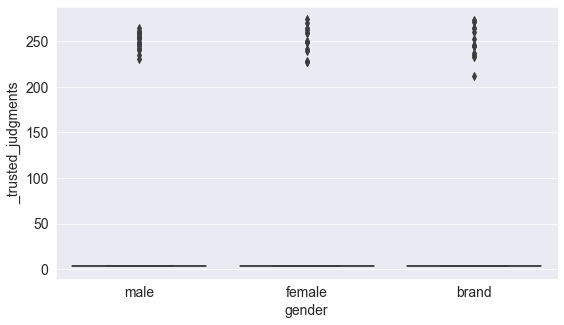

In [29]:
#Looking at th _trusted_judgments column
sns.boxplot(x="gender", y="_trusted_judgments", data=gender_df)

In [31]:
#Top 10 unique values and their counts in _trusted_judgement column
gender_df['_trusted_judgments'].value_counts()[0:10]

3      18786
245        4
249        4
264        4
259        4
260        3
242        3
247        2
227        2
235        2
Name: _trusted_judgments, dtype: int64

From the above plot and value_counts() we can see that **most of the values in this column are equal to 3** and all the gender values also have more or less equal spread.

In [32]:
# looking at profile_yn column
gender_df['profile_yn'].unique()

array(['yes'], dtype=object)

Above code-shell shows that **profile_yn** column has all same values so this column doesn't provide any new information

There are few columns that doesn't provide any significant information in classification of gender.<br>
Those are **_last_judgment_at**, **gender:confidence**, **profile_yn:confidence**, **created**, **profileimage**, **tweet_id**, **user_timezone**, **tweet_location** and **tweet_created**.

In [33]:
gender_df.shape

(18836, 20)

In [34]:
##Removing all the unrequired columns
gender_df = gender_df.drop(['_last_judgment_at', 'gender:confidence', 'profile_yn:confidence', 'created',
                            'profileimage', 'tweet_id', 'user_timezone', 'tweet_location', 'tweet_created',
                            'profile_yn', '_trusted_judgments'], axis=1)
gender_df.head()

,gender,description,fav_number,link_color,name,retweet_count,sidebar_color,text,tweet_count
0,male,i sing my own rhythm.,0,08C2C2,sheezy0,0,FFFFFF,Robbie E Responds To Critics After Win Against...,110964
1,male,I'm the author of novels filled with family dr...,68,0084B4,DavdBurnett,0,C0DEED,ÛÏIt felt like they were my friends and I was...,7471
2,male,louis whining and squealing and all,7696,ABB8C2,lwtprettylaugh,1,C0DEED,i absolutely adore when louis starts the songs...,5617
3,male,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,0084B4,douggarland,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,1693
4,female,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,3B94D9,WilfordGemma,0,0,Watching Neighbours on Sky+ catching up with t...,31462


In [35]:
gender_df.shape

(18836, 9)

E:\ANACONDA3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
E:\ANACONDA3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
E:\ANACONDA3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


<Figure size 1440x1440 with 0 Axes>

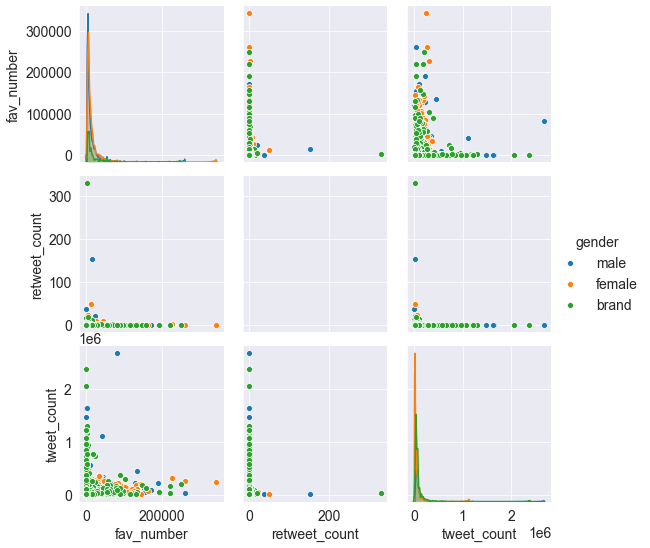

In [38]:
# Ploting a pair plot to visualize the numerical data
plt.figure(figsize=(20, 20))
sns.pairplot(gender_df[['gender', 'fav_number', 'retweet_count', 'tweet_count']], hue='gender')

In [39]:
gender_df['retweet_count'].nunique()

22

In [42]:
gender_df['retweet_count'].value_counts()

0      18243
1        476
2         54
3         17
6          8
5          7
4          6
7          5
8          3
10         2
12         2
11         2
20         2
19         1
49         1
330        1
36         1
153        1
13         1
23         1
9          1
15         1
Name: retweet_count, dtype: int64

In [46]:
gender_df[gender_df['retweet_count'] == 0]['gender'].value_counts()

female    6527
male      5970
brand     5746
Name: gender, dtype: int64

In [47]:
gender_df[gender_df['retweet_count'] != 0]['gender'].value_counts()

male      224
brand     196
female    173
Name: gender, dtype: int64

In [44]:
gender_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18836 entries, 0 to 18835
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         18836 non-null  object
 1   description    15522 non-null  object
 2   fav_number     18836 non-null  int64 
 3   link_color     18836 non-null  object
 4   name           18836 non-null  object
 5   retweet_count  18836 non-null  int64 
 6   sidebar_color  18836 non-null  object
 7   text           18836 non-null  object
 8   tweet_count    18836 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 1.3+ MB


In [48]:
## Replacing all the null values of description column with ""(empty string)
def removal_of_description_nan(desc):
    if type(desc) == str:
        return desc
    else:
        import math
        if math.isnan(desc):
            return "NaN"
        else:
            return desc

gender_df['description'] = gender_df['description'].apply(removal_of_description_nan)

In [49]:
gender_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18836 entries, 0 to 18835
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         18836 non-null  object
 1   description    18836 non-null  object
 2   fav_number     18836 non-null  int64 
 3   link_color     18836 non-null  object
 4   name           18836 non-null  object
 5   retweet_count  18836 non-null  int64 
 6   sidebar_color  18836 non-null  object
 7   text           18836 non-null  object
 8   tweet_count    18836 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 1.3+ MB


In [50]:
gender_df['name'].nunique()

17704

The **name** column has more or less all unique rows.<br>
It also doesn't provide any consistent classification.

In [51]:
# Removing name column
gender_df = gender_df.drop('name', axis=1)
gender_df.head()

,gender,description,fav_number,link_color,retweet_count,sidebar_color,text,tweet_count
0,male,i sing my own rhythm.,0,08C2C2,0,FFFFFF,Robbie E Responds To Critics After Win Against...,110964
1,male,I'm the author of novels filled with family dr...,68,0084B4,0,C0DEED,ÛÏIt felt like they were my friends and I was...,7471
2,male,louis whining and squealing and all,7696,ABB8C2,1,C0DEED,i absolutely adore when louis starts the songs...,5617
3,male,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,0084B4,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,1693
4,female,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,3B94D9,0,0,Watching Neighbours on Sky+ catching up with t...,31462


In [53]:
gender_df.shape

(18836, 8)

In [54]:
gender_df.sample(20)

,gender,description,fav_number,link_color,retweet_count,sidebar_color,text,tweet_count
14546,female,Im made of space dust,8288,0084B4,0,C0DEED,My lock screen is my own photography and I'm n...,7221
7998,male,"When the going gets tough, the tough get going...",17066,0084B4,0,C0DEED,Fantastic launch by @Snapdeal All apps now run...,63060
3006,female,"÷ø I had a conversation with Harry and Louis,...",3926,F5ABB5,0,0,@clirwoodmings @ChezLoudKidz Youll meet him on...,6794
6386,male,RIP uncle devon,1545,0084B4,0,C0DEED,Mcdonalds after school is the best,24129
953,male,,5959,F5ABB5,0,C0DEED,Who decided the way we should live our lives i...,21521
4541,male,,984,0084B4,0,C0DEED,The relative speed of a computer,116003
15500,male,"Notre Dame and Fordham alum, formerly didåÊtec...",18070,9999,0,EEEEEE,ItÛªs in direct opposition to established sci...,79428
5663,male,cogita | ergo | sum,144,FF4400,0,0,THRUSH:Technological Hierarchy for the Removal...,19112
4920,male,"part man, part machine, all cop",336,0084B4,0,C0DEED,Why the fuck did I renew for another 6 months?,1839
4635,female,,0,0084B4,0,C0DEED,@bradenfinnian going to. When they found her f...,438


In [55]:
#Removing retweet_count column, as most of the rows(above 90%) have same value of 0
gender_df = gender_df.drop('retweet_count', axis=1)
gender_df.head()

,gender,description,fav_number,link_color,sidebar_color,text,tweet_count
0,male,i sing my own rhythm.,0,08C2C2,FFFFFF,Robbie E Responds To Critics After Win Against...,110964
1,male,I'm the author of novels filled with family dr...,68,0084B4,C0DEED,ÛÏIt felt like they were my friends and I was...,7471
2,male,louis whining and squealing and all,7696,ABB8C2,C0DEED,i absolutely adore when louis starts the songs...,5617
3,male,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,0084B4,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,1693
4,female,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,3B94D9,0,Watching Neighbours on Sky+ catching up with t...,31462


In [56]:
gender_df.sample(20)

,gender,description,fav_number,link_color,sidebar_color,text,tweet_count
5013,male,Indie author writing a thriller for #NaNoWriMo...,2,6F9920,0,Indie Authors - 7 Ways to Improve Your Odds fo...,8774
12740,female,PROUD ARMY WIFE_ü I love my Soldier CHASE ...,16537,0084B4,C0DEED,HAPPY BIRTHDAY B_ÙÕÏ love and miss you tons!!!...,20099
13589,brand,Meditation news from Reddit,71563,0084B4,C0DEED,Meditation: Meditation for Beginners - How to ...,6787
4554,female,put trust in yourself,1704,ABB8C2,0,they should get married they would hv happy fa...,6037
10716,brand,Subscribe to her Inspirational channel here ht...,0,9266CC,0,5 Fruits and Vegetables That Look Suspiciously...,12185
14548,female,Europe Fashion Men's And Women Wears...All kin...,77,F5ABB5,C0DEED,Europe Fashion Men's And Women Wears......: Th...,3668
4210,male,BME Shenandoah MA Morgan State Business owne...,20,0084B4,C0DEED,FY 2017 BUDGET WMATA https://t.co/watBogzQQ4,7002
9595,female,ig: lowkey_roxanna,3477,9999,FFFFFF,btw don't get too excited and try to put on yo...,25013
16664,brand,"My favorite cartoon characters are Greenday,Me...",76,0,0,when you get a massive headache after working ...,321
14979,female,Smile Always.,5283,0084B4,C0DEED,@ChristianJerard I always do it class &amp; pp...,2797


#### Adding few new columns  

In [57]:
#Adding a new column that contains length of the description
gender_df['desc_len'] = gender_df['description'].apply(len)

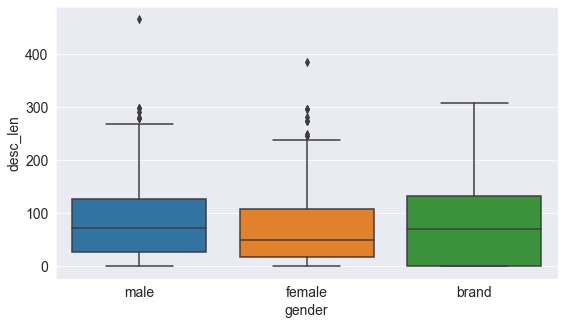

In [58]:
sns.boxplot(x="gender", y="desc_len", data=gender_df)

In [59]:
#Adding a new column that contains length of the text(random tweet)
gender_df['tweet_len'] = gender_df['text'].apply(len)

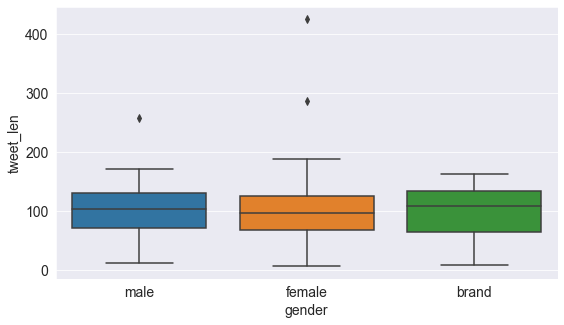

In [60]:
sns.boxplot(x="gender", y="tweet_len", data=gender_df)

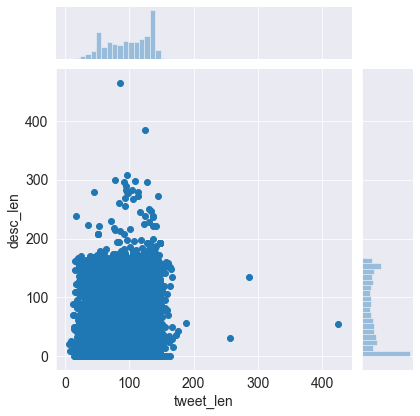

In [63]:
sns.jointplot(x='tweet_len', y='desc_len', data=gender_df)

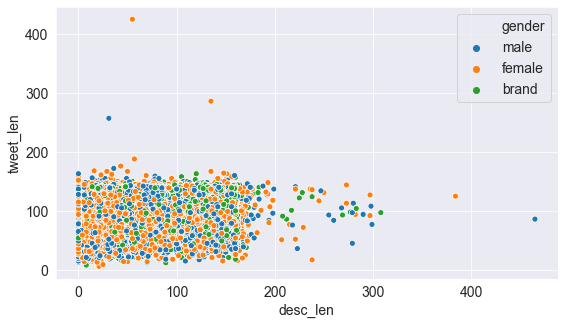

In [65]:
sns.scatterplot(x="desc_len", y="tweet_len", hue='gender', data=gender_df)

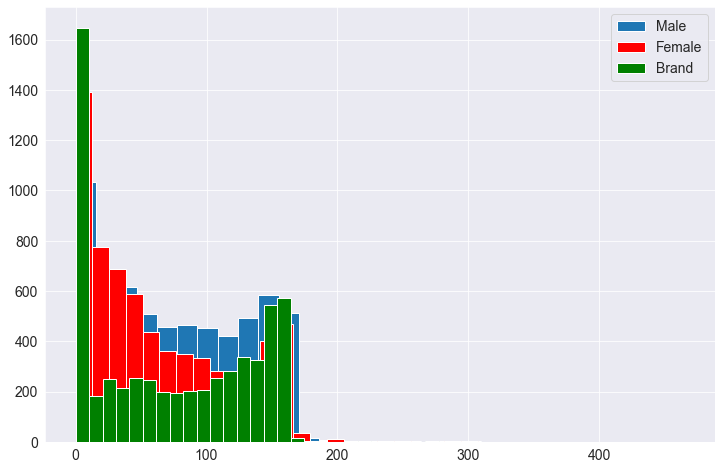

In [73]:
plt.figure(figsize=(12,8))
plt.hist(x=gender_df[gender_df['gender'] == 'male']['desc_len'], bins=30, label='Male')
plt.hist(x=gender_df[gender_df['gender'] == 'female']['desc_len'], bins=30, color='red', label='Female')
plt.hist(x=gender_df[gender_df['gender'] == 'brand']['desc_len'], bins=30, color='green', label='Brand')
plt.legend()
plt.show()

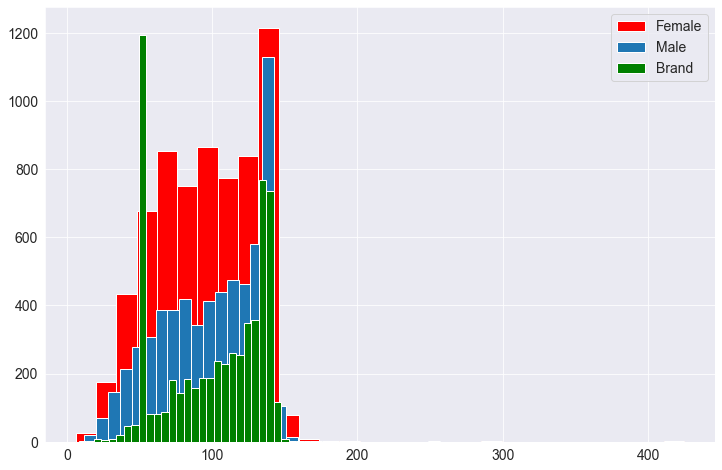

In [72]:
plt.figure(figsize=(12,8))
plt.hist(x=gender_df[gender_df['gender'] == 'female']['tweet_len'], bins=30, color='red', label='Female')
plt.hist(x=gender_df[gender_df['gender'] == 'male']['tweet_len'], bins=30, label='Male')
plt.hist(x=gender_df[gender_df['gender'] == 'brand']['tweet_len'], bins=30, color='green', label='Brand')
plt.legend()
plt.show()

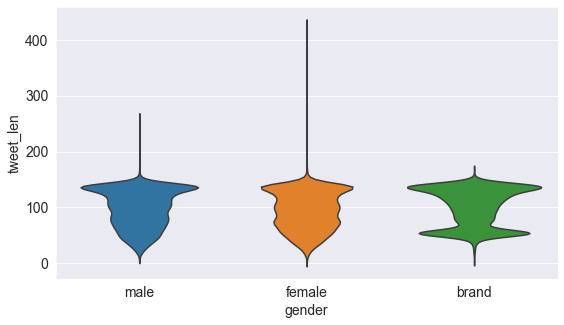

In [75]:
sns.violinplot(x="gender", y="tweet_len", data=gender_df, inner=None)

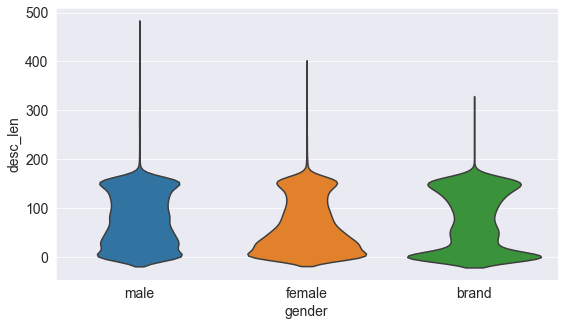

In [76]:
sns.violinplot(x="gender", y="desc_len", data=gender_df, inner=None)

These features **desc_len** & **tweet_len** could be considered in our selected featurs as it shows a little amount of variation which could help in prediction

#### Converting Hex color code to RBG code 

As dealing and understanding with hex code of color is little difficult so we need to convert it into RBG components.

In [81]:
gender_df.rename(columns={'text': 'tweet'}, inplace=True)
gender_df.sample(10)

,gender,description,fav_number,link_color,sidebar_color,tweet,tweet_count,desc_len,tweet_len
3904,female,"@Ryan_EXOE AF,@djbryr is Bae @Callmekarizma is...",45620,ABB8C2,0,Gosh I'm so upset I just got a call from my br...,60114,142,129
1031,male,Dundee home & away #DTID,995,1F98C7,FFFFFF,when the booty dont taste good @Callum_Dickso...,8144,24,71
3854,male,"Works in the poker media, occasional poker pla...",268,2FC2EF,181A1E,Just fired up some 4k material from Netflix an...,16128,117,106
17360,male,Nothing,3,0084B4,C0DEED,#WeLoveBrad #TeamVampettes : Harry_Styles\n\n...,119207,7,144
6667,female,Gsu Alumna ClevelantaÏ_Ïöü,819,9999,9E139E,Everyone at work was talking about Walking Dea...,19533,30,87
3125,male,"I dance, & research success and self improveme...",9,0084B4,C0DEED,"""Every #adversity carries with it the seed of ...",4073,114,94
15880,female,nfl & chill,3699,FF0000,65B0DA,Hey I miss you guys and all of our fun &amp; c...,6546,11,98
15087,female,"but we're the last ones laughing,, pictures or...",3272,ABB8C2,0,i've decided i want to paint my room white and...,46387,63,71
9495,brand,"Art cannot be objectively measured, and I'm no...",1006,0084B4,C0DEED,@Aaron_Sparrow I've seen it. It's on CBS. It i...,14247,137,102
2833,male,"U of Arizona Wildcat Alum, Passionate Customer...",559,0084B4,C0DEED,Customer Feedback: The Greatest Source of Inno...,2665,127,76


In [110]:
#This is a row providing problem as in our prediction. We can see the link_color column has a invalid value. So, we remove this row
gender_df[gender_df['link_color'] == '2.21E+09']

,gender,description,fav_number,link_color,sidebar_color,tweet,tweet_count,desc_len,tweet_len
360,male,Trust no one. #RipSpann 4's Up. Talk about @ri...,2316,2.21E+09,0,Oomf is so cute without the E I swear boy.,68019,128,42


In [117]:
#This is a row providing problem as in our prediction. We can see the link_color column has a invalid value. So, we remove this row
gender_df[gender_df['link_color'] == '2.79E+11']

,gender,description,fav_number,link_color,sidebar_color,tweet,tweet_count,desc_len,tweet_len
652,male,"ProCannabis,ProPsychedelics,AntiOrganizedRelig...",2628,2.79E+11,0,The secret lies in our sense of wonder and bea...,5247,152,50


In [113]:
#Droping the row and reseting the index
gender_df.drop(index = 360, inplace=True)
gender_df.reset_index(inplace=True)
gender_df = gender_df.drop('index', axis=1)
gender_df

,gender,description,fav_number,link_color,sidebar_color,tweet,tweet_count,desc_len,tweet_len
0,male,i sing my own rhythm.,0,08C2C2,FFFFFF,Robbie E Responds To Critics After Win Against...,110964,21,109
1,male,I'm the author of novels filled with family dr...,68,0084B4,C0DEED,ÛÏIt felt like they were my friends and I was...,7471,62,139
2,male,louis whining and squealing and all,7696,ABB8C2,C0DEED,i absolutely adore when louis starts the songs...,5617,35,80
3,male,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,0084B4,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,1693,146,138
4,female,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,3B94D9,0,Watching Neighbours on Sky+ catching up with t...,31462,160,95
...,...,...,...,...,...,...,...,...,...
18830,female,(rp),302,0084B4,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",783,4,59
18831,male,"Whatever you like, it's not a problem at all. ...",2513,CFB929,0,Greg Hardy you a good player and all but don't...,13523,103,100
18832,male,#TeamBarcelona ..You look lost so you should f...,50,0084B4,C0DEED,You can miss people and still never want to se...,26419,116,58
18833,female,Anti-statist; I homeschool my kids. Aspiring t...,70804,9266CC,0,@bitemyapp i had noticed your tendency to pee ...,56073,145,97


In [118]:
#Droping the row and reseting the index
gender_df.drop(index = 652, inplace=True)
gender_df.reset_index(inplace=True)
gender_df = gender_df.drop('index', axis=1)
gender_df

,gender,description,fav_number,link_color,sidebar_color,tweet,tweet_count,desc_len,tweet_len
0,male,i sing my own rhythm.,0,08C2C2,FFFFFF,Robbie E Responds To Critics After Win Against...,110964,21,109
1,male,I'm the author of novels filled with family dr...,68,0084B4,C0DEED,ÛÏIt felt like they were my friends and I was...,7471,62,139
2,male,louis whining and squealing and all,7696,ABB8C2,C0DEED,i absolutely adore when louis starts the songs...,5617,35,80
3,male,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,0084B4,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,1693,146,138
4,female,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,3B94D9,0,Watching Neighbours on Sky+ catching up with t...,31462,160,95
...,...,...,...,...,...,...,...,...,...
18829,female,(rp),302,0084B4,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",783,4,59
18830,male,"Whatever you like, it's not a problem at all. ...",2513,CFB929,0,Greg Hardy you a good player and all but don't...,13523,103,100
18831,male,#TeamBarcelona ..You look lost so you should f...,50,0084B4,C0DEED,You can miss people and still never want to se...,26419,116,58
18832,female,Anti-statist; I homeschool my kids. Aspiring t...,70804,9266CC,0,@bitemyapp i had noticed your tendency to pee ...,56073,145,97


In [124]:
#Function to convert hex color code to RBG color code
def hex_to_rbg(hex_code):
    hex_code = str(hex_code)                                                  # converting hex_code to string 
    if len(hex_code) > 6:                                                           #this checks that if any wrong input is provided then it returns only None
        return None
    if len(hex_code) < 6:                                                          #Checking if the length is less than 6 
        hex_code = "0" * (6-len(hex_code)) + hex_code          #converting the length of hex_code to 6
    return tuple(int(hex_code[i:i+2], 16) for i in (0, 2, 4))       #Returning the RBG value as a tuple i.e., (R, B, G)

In [127]:
#Adding two columns 
gender_df['RBG_link_color'] = gender_df['link_color'].apply(hex_to_rbg)
gender_df['RBG_sidebar_color'] = gender_df['sidebar_color'].apply(hex_to_rbg)

In [128]:
gender_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18834 entries, 0 to 18833
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   gender             18834 non-null  object
 1   description        18834 non-null  object
 2   fav_number         18834 non-null  int64 
 3   link_color         18834 non-null  object
 4   sidebar_color      18834 non-null  object
 5   tweet              18834 non-null  object
 6   tweet_count        18834 non-null  int64 
 7   desc_len           18834 non-null  int64 
 8   tweet_len          18834 non-null  int64 
 9   RBG_link_color     18802 non-null  object
 10  RBG_sidebar_color  18827 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.6+ MB


Now we have already converted **link_color** & **sidebar_color** column to their RBG components so we can drop these columns

In [130]:
gender_df.drop(columns=['link_color', 'sidebar_color'], inplace=True)
gender_df

,gender,description,fav_number,tweet,tweet_count,desc_len,tweet_len,RBG_link_color,RBG_sidebar_color
0,male,i sing my own rhythm.,0,Robbie E Responds To Critics After Win Against...,110964,21,109,"(8, 194, 194)","(255, 255, 255)"
1,male,I'm the author of novels filled with family dr...,68,ÛÏIt felt like they were my friends and I was...,7471,62,139,"(0, 132, 180)","(192, 222, 237)"
2,male,louis whining and squealing and all,7696,i absolutely adore when louis starts the songs...,5617,35,80,"(171, 184, 194)","(192, 222, 237)"
3,male,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,Hi @JordanSpieth - Looking at the url - do you...,1693,146,138,"(0, 132, 180)","(192, 222, 237)"
4,female,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,Watching Neighbours on Sky+ catching up with t...,31462,160,95,"(59, 148, 217)","(0, 0, 0)"
...,...,...,...,...,...,...,...,...,...
18829,female,(rp),302,"@lookupondeath ...Fine, and I'll drink tea too...",783,4,59,"(0, 132, 180)","(192, 222, 237)"
18830,male,"Whatever you like, it's not a problem at all. ...",2513,Greg Hardy you a good player and all but don't...,13523,103,100,"(207, 185, 41)","(0, 0, 0)"
18831,male,#TeamBarcelona ..You look lost so you should f...,50,You can miss people and still never want to se...,26419,116,58,"(0, 132, 180)","(192, 222, 237)"
18832,female,Anti-statist; I homeschool my kids. Aspiring t...,70804,@bitemyapp i had noticed your tendency to pee ...,56073,145,97,"(146, 102, 204)","(0, 0, 0)"


In [144]:
# Removing all the null values from the RGB_link_color & RGB_sidebar_color  column
gender_df = gender_df[gender_df['RBG_link_color'].notna()]
gender_df = gender_df[gender_df['RBG_sidebar_color'].notna()]

In [145]:
gender_df.shape

(18795, 9)

In [146]:
# Saved the Dataframe
gender_df.to_csv('final_gender.csv')

In [147]:
# To deal with the text part we make a different dataframe
text_df = gender_df[['description', 'tweet', 'gender']]
text_df.to_csv('text_twitter.csv')

Now let's convert the RBG column into a *single number equivalent* using **Gaussian Method**: **$ \frac{2\times G + R + B}{255 \times 4}$**<br>
This will output a number equivalent of each color in between 0 and 1<br>
If we want the value to be in the range of 0 to 255 the just multiply with 255

In [150]:
#Function that converts RGB tuple into a Gaussian pixel value
def RGB_to_no(rgb_tuple, scale=True):
    if scale == True:
        return (rgb_tuple[0] + rgb_tuple[2] + 2 * rgb_tuple[1])/(255.0 * 4)
    else: 
        return (rgb_tuple[0] + rgb_tuple[2] + 2 * rgb_tuple[1])//(4)

In [158]:
#Adding a column named link_color  which is a gaussian representation of the RBG_link_color
gender_df['link_color'] = gender_df['RBG_link_color'].apply(RGB_to_no)
gender_df

,gender,description,fav_number,tweet,tweet_count,desc_len,tweet_len,RBG_link_color,RBG_sidebar_color,link_color
0,male,i sing my own rhythm.,0,Robbie E Responds To Critics After Win Against...,110964,21,109,"(8, 194, 194)","(255, 255, 255)",0.578431
1,male,I'm the author of novels filled with family dr...,68,ÛÏIt felt like they were my friends and I was...,7471,62,139,"(0, 132, 180)","(192, 222, 237)",0.435294
2,male,louis whining and squealing and all,7696,i absolutely adore when louis starts the songs...,5617,35,80,"(171, 184, 194)","(192, 222, 237)",0.718627
3,male,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,Hi @JordanSpieth - Looking at the url - do you...,1693,146,138,"(0, 132, 180)","(192, 222, 237)",0.435294
4,female,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,Watching Neighbours on Sky+ catching up with t...,31462,160,95,"(59, 148, 217)","(0, 0, 0)",0.560784
...,...,...,...,...,...,...,...,...,...,...
18829,female,(rp),302,"@lookupondeath ...Fine, and I'll drink tea too...",783,4,59,"(0, 132, 180)","(192, 222, 237)",0.435294
18830,male,"Whatever you like, it's not a problem at all. ...",2513,Greg Hardy you a good player and all but don't...,13523,103,100,"(207, 185, 41)","(0, 0, 0)",0.605882
18831,male,#TeamBarcelona ..You look lost so you should f...,50,You can miss people and still never want to se...,26419,116,58,"(0, 132, 180)","(192, 222, 237)",0.435294
18832,female,Anti-statist; I homeschool my kids. Aspiring t...,70804,@bitemyapp i had noticed your tendency to pee ...,56073,145,97,"(146, 102, 204)","(0, 0, 0)",0.543137


In [159]:
#Adding a column named sidebar_color  which is a gaussian representation of the RBG_sidebar_color
gender_df['sidebar_color'] = gender_df['RBG_sidebar_color'].apply(RGB_to_no)
gender_df

,gender,description,fav_number,tweet,tweet_count,desc_len,tweet_len,RBG_link_color,RBG_sidebar_color,link_color,sidebar_color
0,male,i sing my own rhythm.,0,Robbie E Responds To Critics After Win Against...,110964,21,109,"(8, 194, 194)","(255, 255, 255)",0.578431,1.000000
1,male,I'm the author of novels filled with family dr...,68,ÛÏIt felt like they were my friends and I was...,7471,62,139,"(0, 132, 180)","(192, 222, 237)",0.435294,0.855882
2,male,louis whining and squealing and all,7696,i absolutely adore when louis starts the songs...,5617,35,80,"(171, 184, 194)","(192, 222, 237)",0.718627,0.855882
3,male,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,Hi @JordanSpieth - Looking at the url - do you...,1693,146,138,"(0, 132, 180)","(192, 222, 237)",0.435294,0.855882
4,female,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,Watching Neighbours on Sky+ catching up with t...,31462,160,95,"(59, 148, 217)","(0, 0, 0)",0.560784,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
18829,female,(rp),302,"@lookupondeath ...Fine, and I'll drink tea too...",783,4,59,"(0, 132, 180)","(192, 222, 237)",0.435294,0.855882
18830,male,"Whatever you like, it's not a problem at all. ...",2513,Greg Hardy you a good player and all but don't...,13523,103,100,"(207, 185, 41)","(0, 0, 0)",0.605882,0.000000
18831,male,#TeamBarcelona ..You look lost so you should f...,50,You can miss people and still never want to se...,26419,116,58,"(0, 132, 180)","(192, 222, 237)",0.435294,0.855882
18832,female,Anti-statist; I homeschool my kids. Aspiring t...,70804,@bitemyapp i had noticed your tendency to pee ...,56073,145,97,"(146, 102, 204)","(0, 0, 0)",0.543137,0.000000


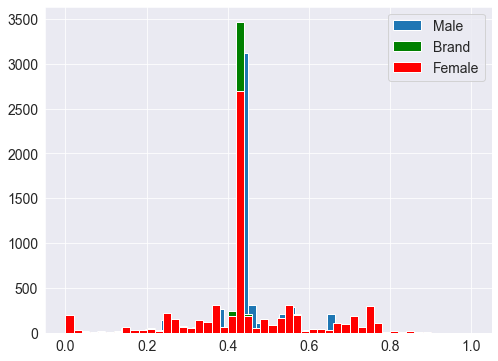

In [156]:
#plotting the histogram fot link_color column 
plt.figure(figsize=(8,6))
plt.hist(x=gender_df[gender_df['gender'] == 'male']['link_color'], bins=50, label='Male')
plt.hist(x=gender_df[gender_df['gender'] == 'brand']['link_color'], bins=50, color='green', label='Brand')
plt.hist(x=gender_df[gender_df['gender'] == 'female']['link_color'], bins=50, color='red', label='Female')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Brand')

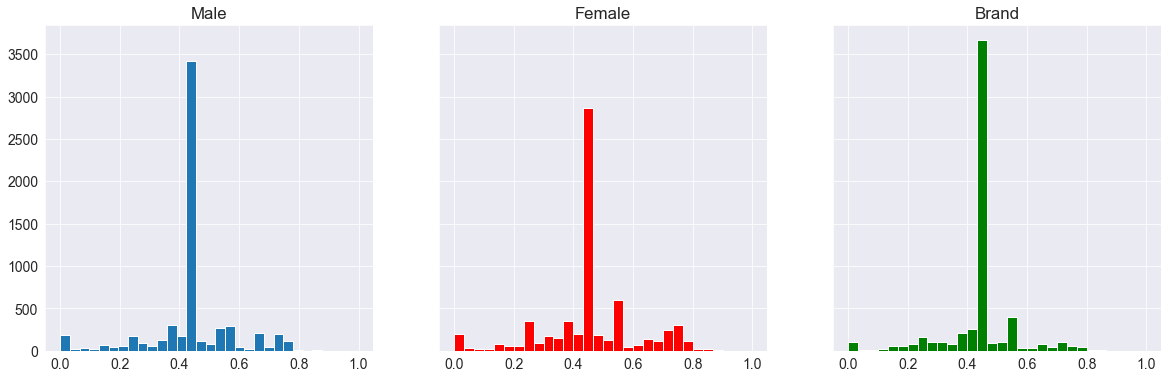

In [174]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(20, 6))

ax1.hist(x=gender_df[gender_df['gender'] == 'male']['link_color'], bins=30)
ax1.set_title('Male')

ax2.hist(x=gender_df[gender_df['gender'] == 'female']['link_color'], bins=30, color='red')
ax2.set_title('Female')

ax3.hist(x=gender_df[gender_df['gender'] == 'brand']['link_color'], bins=30, color='green')
ax3.set_title('Brand')

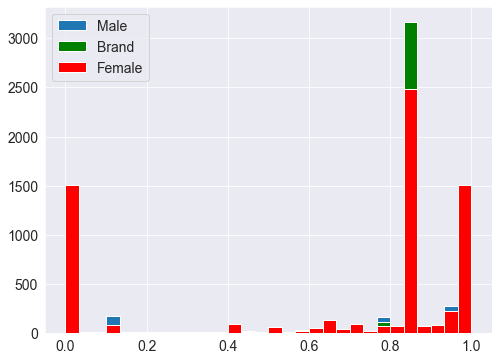

In [169]:
#plotting the histogram fot sidebar_color column 
plt.figure(figsize=(8,6))
plt.hist(x=gender_df[gender_df['gender'] == 'male']['sidebar_color'], bins=30, label='Male')
plt.hist(x=gender_df[gender_df['gender'] == 'brand']['sidebar_color'], bins=30, color='green', label='Brand')
plt.hist(x=gender_df[gender_df['gender'] == 'female']['sidebar_color'], bins=30, color='red', label='Female')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Brand')

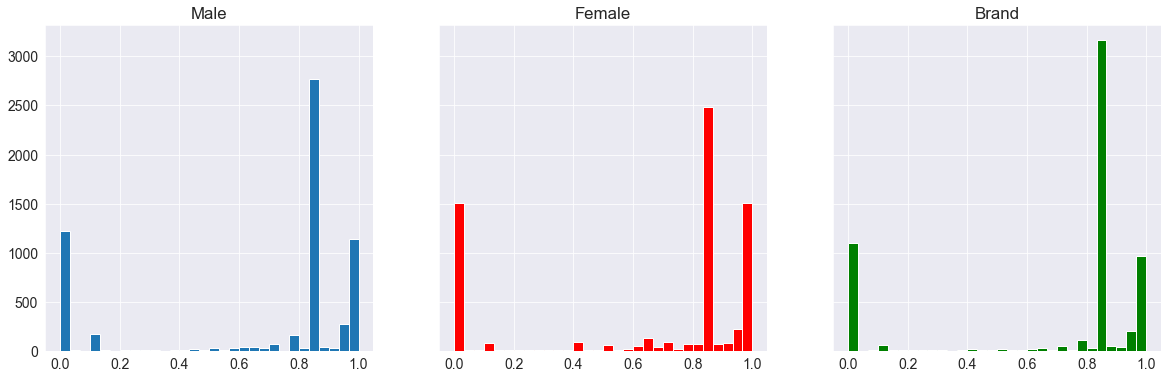

In [173]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(20, 6))

ax1.hist(x=gender_df[gender_df['gender'] == 'male']['sidebar_color'], bins=30)
ax1.set_title('Male')

ax2.hist(x=gender_df[gender_df['gender'] == 'female']['sidebar_color'], bins=30, color='red')
ax2.set_title('Female')

ax3.hist(x=gender_df[gender_df['gender'] == 'brand']['sidebar_color'], bins=30, color='green')
ax3.set_title('Brand')

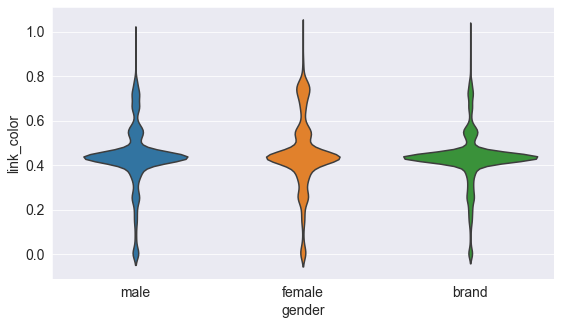

In [157]:
#plotting voilinplot to see the variation for link_color
sns.violinplot(x="gender", y="link_color", data=gender_df, inner=None)

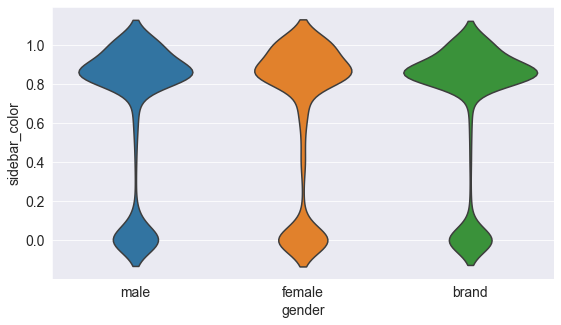

In [161]:
#plotting voilinplot to see the variation for sidebar_color
sns.violinplot(x="gender", y="sidebar_color", data=gender_df, inner=None)

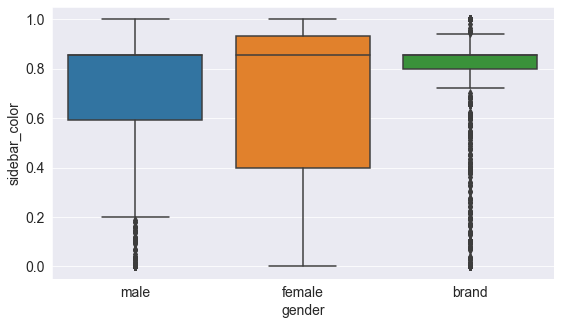

In [162]:
#plotting boxplot for the sidebar_color column
sns.boxplot(x="gender", y="sidebar_color", data=gender_df)

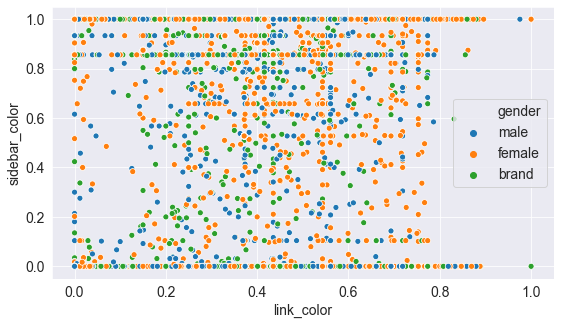

In [165]:
#Plotting a scatterplot between link_color, sidebar_color to see the distribution
sns.scatterplot(x='link_color', y='sidebar_color', hue='gender', data = gender_df)

In [175]:
#Saving the Dataframe into a csv file
gender_df.to_csv('final_gender.csv')

I have performed the Text analysis in **Text Analysis.ipynb**  and the saved the result in **text_analysised.csv**. Now I am going the import both the analysised csvs and concatenate them

In [176]:
data1 = pd.read_csv('final_gender.csv')
data1.head()

,Unnamed: 0,gender,description,fav_number,tweet,tweet_count,desc_len,tweet_len,RBG_link_color,RBG_sidebar_color,link_color,sidebar_color
0,0,male,i sing my own rhythm.,0,Robbie E Responds To Critics After Win Against...,110964,21,109,"(8, 194, 194)","(255, 255, 255)",0.578431,1.000000
1,1,male,I'm the author of novels filled with family dr...,68,ÛÏIt felt like they were my friends and I was...,7471,62,139,"(0, 132, 180)","(192, 222, 237)",0.435294,0.855882
2,2,male,louis whining and squealing and all,7696,i absolutely adore when louis starts the songs...,5617,35,80,"(171, 184, 194)","(192, 222, 237)",0.718627,0.855882
3,3,male,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,Hi @JordanSpieth - Looking at the url - do you...,1693,146,138,"(0, 132, 180)","(192, 222, 237)",0.435294,0.855882
4,4,female,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,Watching Neighbours on Sky+ catching up with t...,31462,160,95,"(59, 148, 217)","(0, 0, 0)",0.560784,0.000000


In [177]:
# Remove the unwanted columns
data1.drop(columns=['Unnamed: 0'], inplace=True)

In [178]:
data2 = pd.read_csv('text_analysised.csv')
data2.head()

,Unnamed: 0,gender,tweet_words,desc_words,Male_T_Score,Female_T_Score,Brand_T_Score,Male_D_Score,Female_D_Score,Brand_D_Score
0,0,male,"['robbi', 'e', 'respond', 'critic', 'win', 'ed...","['sing', 'rhythm']",0.011182,0.009599,0.010630,0.001268,0.002638,0.000330
1,1,male,"['ûïit', 'felt', 'like', 'friend', 'live', 'st...","['author', 'novel', 'fill', 'famili', 'drama',...",0.051138,0.058385,0.046946,0.018237,0.018495,0.010452
2,2,male,"['absolut', 'ador', 'loui', 'start', 'song', '...","['loui', 'whine', 'squeal']",0.043089,0.042259,0.020020,0.002076,0.001545,0.001330
3,3,male,"['hi', 'jordanspieth', 'look', 'url', 'use', '...","['mobil', 'guy', 'er', 'shazam', 'googl', 'kle...",0.038179,0.036107,0.030881,0.043338,0.011477,0.018466
4,4,female,"['watch', 'neighbour', 'sky', 'catch', 'neighb...","['ricki', 'wilson', 'best', 'frontman', 'kaise...",0.053490,0.119514,0.018620,0.039516,0.044602,0.044812


In [179]:
# Remove the unwanted columns
data2.drop(columns=['Unnamed: 0', 'gender'], inplace=True)

In [180]:
#Concating the two dataframe to get a final dataframe
final_df = pd.concat([data1, data2], axis=1)
final_df.head()

,gender,description,fav_number,tweet,tweet_count,desc_len,tweet_len,RBG_link_color,RBG_sidebar_color,link_color,sidebar_color,tweet_words,desc_words,Male_T_Score,Female_T_Score,Brand_T_Score,Male_D_Score,Female_D_Score,Brand_D_Score
0,male,i sing my own rhythm.,0,Robbie E Responds To Critics After Win Against...,110964,21,109,"(8, 194, 194)","(255, 255, 255)",0.578431,1.000000,"['robbi', 'e', 'respond', 'critic', 'win', 'ed...","['sing', 'rhythm']",0.011182,0.009599,0.010630,0.001268,0.002638,0.000330
1,male,I'm the author of novels filled with family dr...,68,ÛÏIt felt like they were my friends and I was...,7471,62,139,"(0, 132, 180)","(192, 222, 237)",0.435294,0.855882,"['ûïit', 'felt', 'like', 'friend', 'live', 'st...","['author', 'novel', 'fill', 'famili', 'drama',...",0.051138,0.058385,0.046946,0.018237,0.018495,0.010452
2,male,louis whining and squealing and all,7696,i absolutely adore when louis starts the songs...,5617,35,80,"(171, 184, 194)","(192, 222, 237)",0.718627,0.855882,"['absolut', 'ador', 'loui', 'start', 'song', '...","['loui', 'whine', 'squeal']",0.043089,0.042259,0.020020,0.002076,0.001545,0.001330
3,male,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,Hi @JordanSpieth - Looking at the url - do you...,1693,146,138,"(0, 132, 180)","(192, 222, 237)",0.435294,0.855882,"['hi', 'jordanspieth', 'look', 'url', 'use', '...","['mobil', 'guy', 'er', 'shazam', 'googl', 'kle...",0.038179,0.036107,0.030881,0.043338,0.011477,0.018466
4,female,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,Watching Neighbours on Sky+ catching up with t...,31462,160,95,"(59, 148, 217)","(0, 0, 0)",0.560784,0.000000,"['watch', 'neighbour', 'sky', 'catch', 'neighb...","['ricki', 'wilson', 'best', 'frontman', 'kaise...",0.053490,0.119514,0.018620,0.039516,0.044602,0.044812


In [181]:
final_df.shape

(18795, 19)

E:\ANACONDA3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


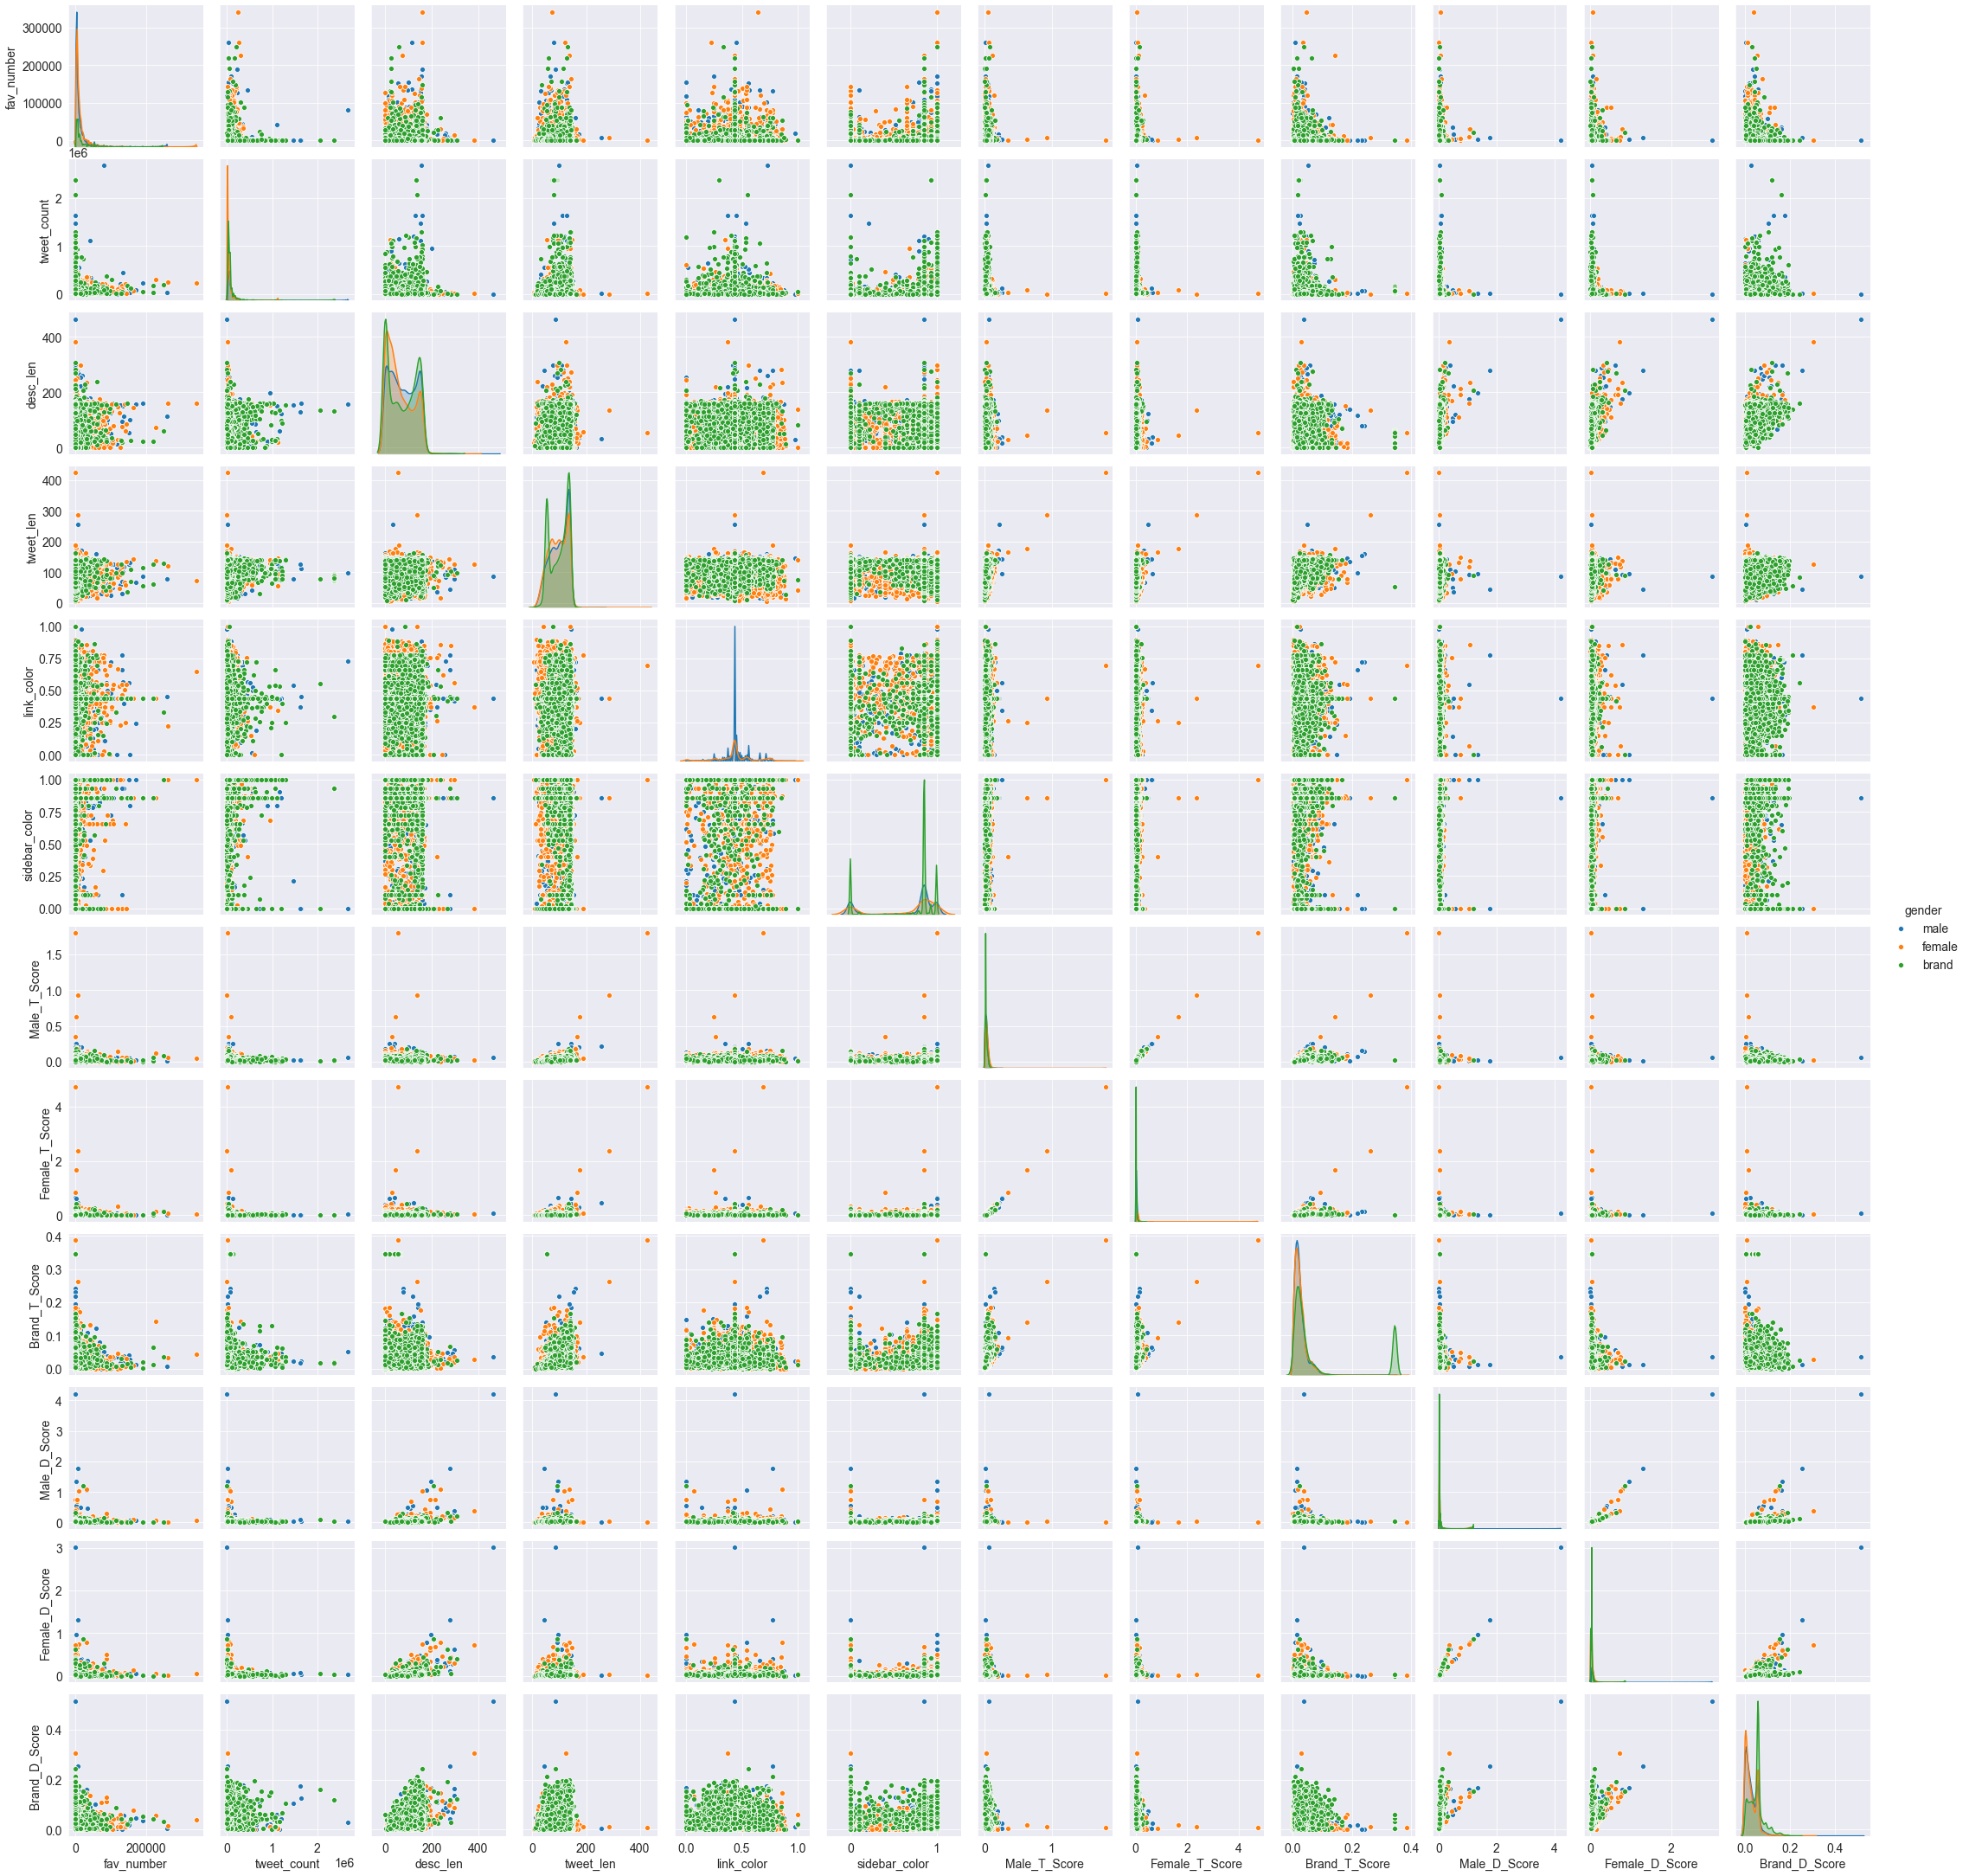

In [183]:
sns.pairplot(final_df[['gender', 'fav_number', 'tweet_count', 'desc_len', 'tweet_len', 'link_color', 'sidebar_color', 'Male_T_Score', 'Female_T_Score', 'Brand_T_Score', 'Male_D_Score', 'Female_D_Score', 'Brand_D_Score']], hue='gender')

In [184]:
# Saving the finalized & analysised dataset
final_df.to_csv('final.csv')